2019-03
2019-04
2019-05
2019-06
2019-12


/home/thiago/Desenvolvimento/estudos_data_science/venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


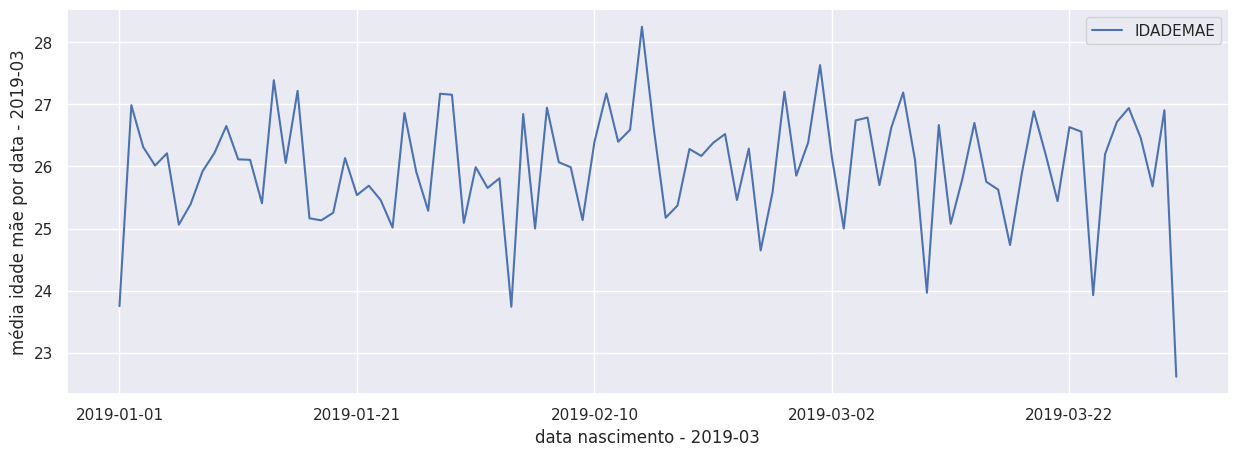

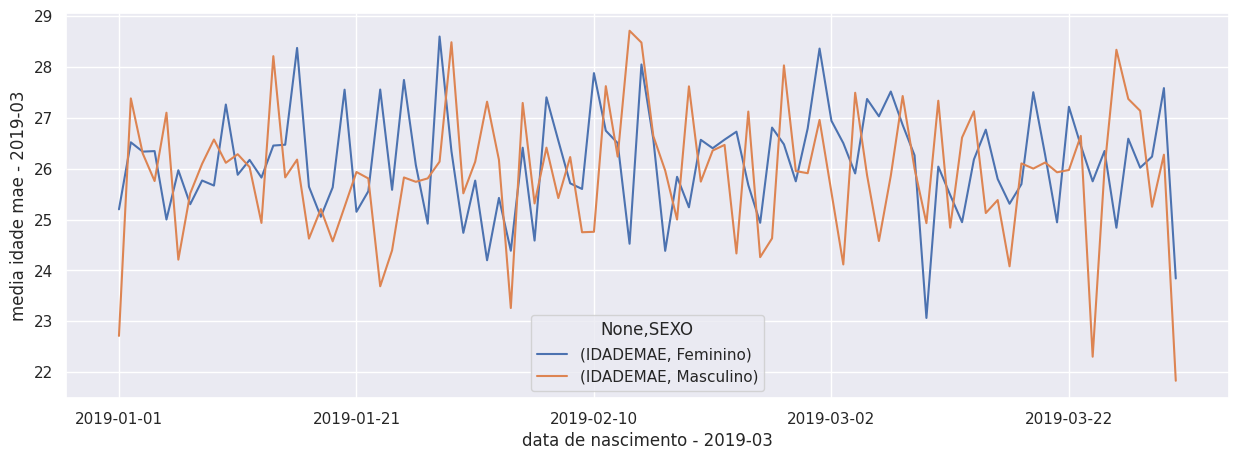

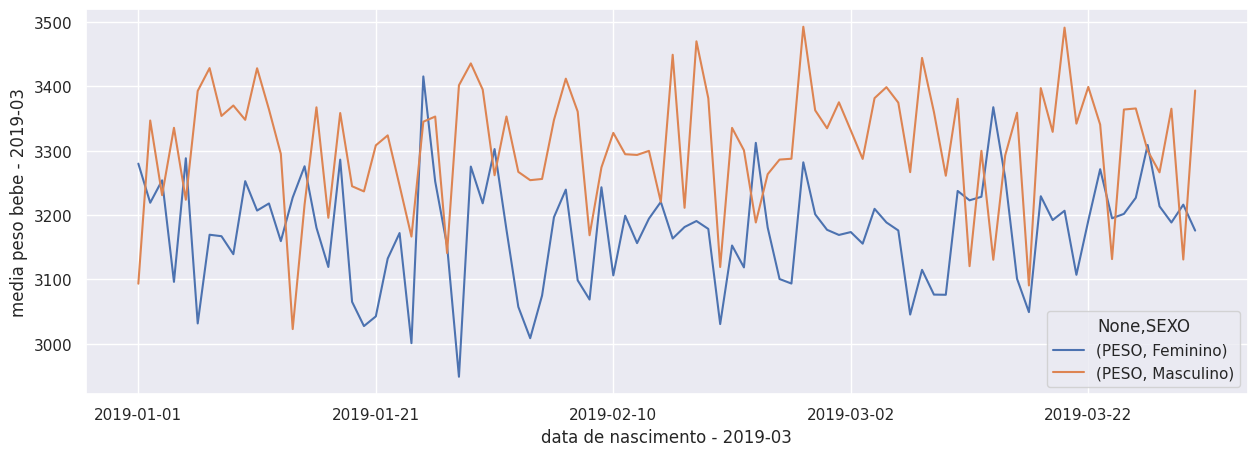

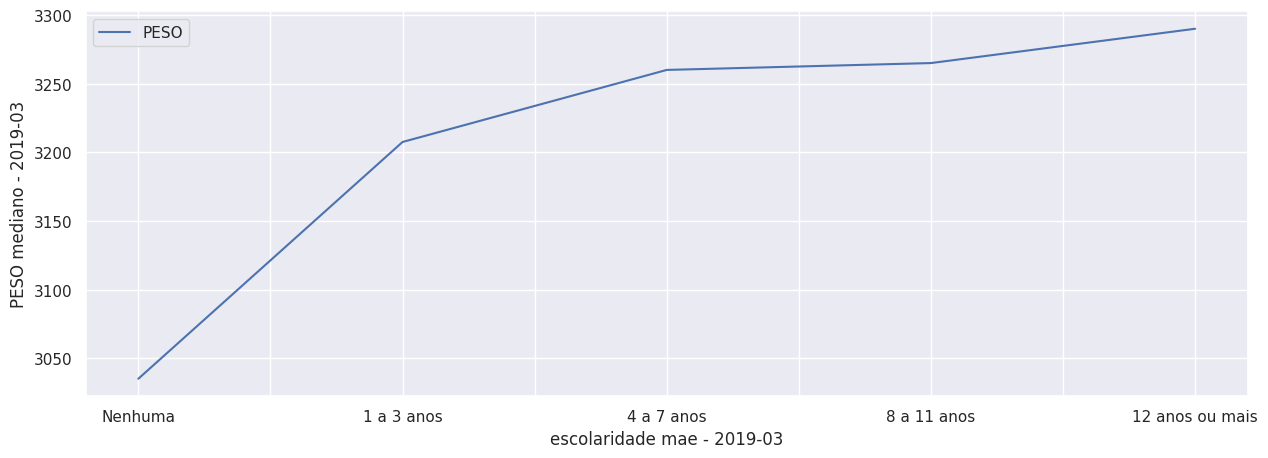

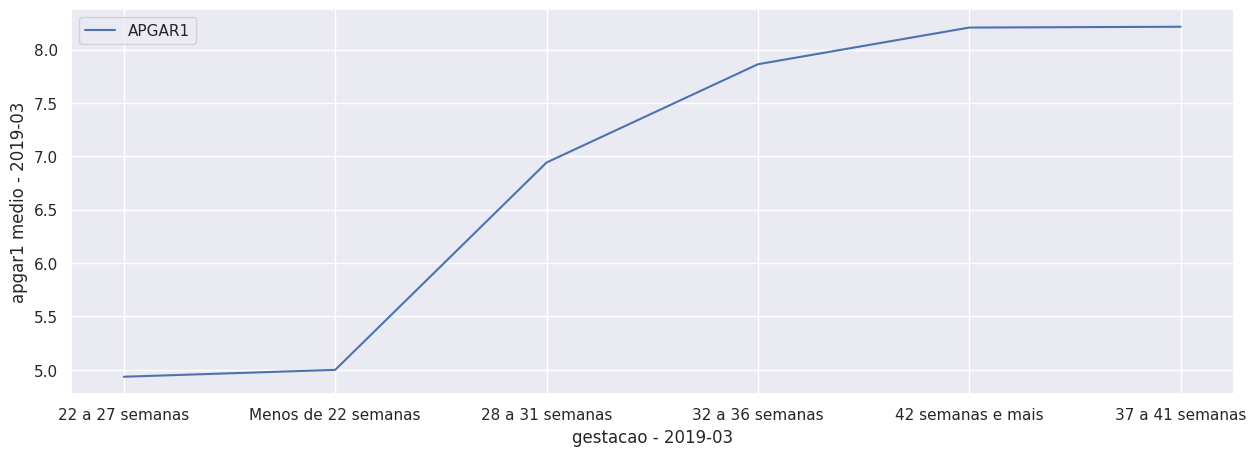

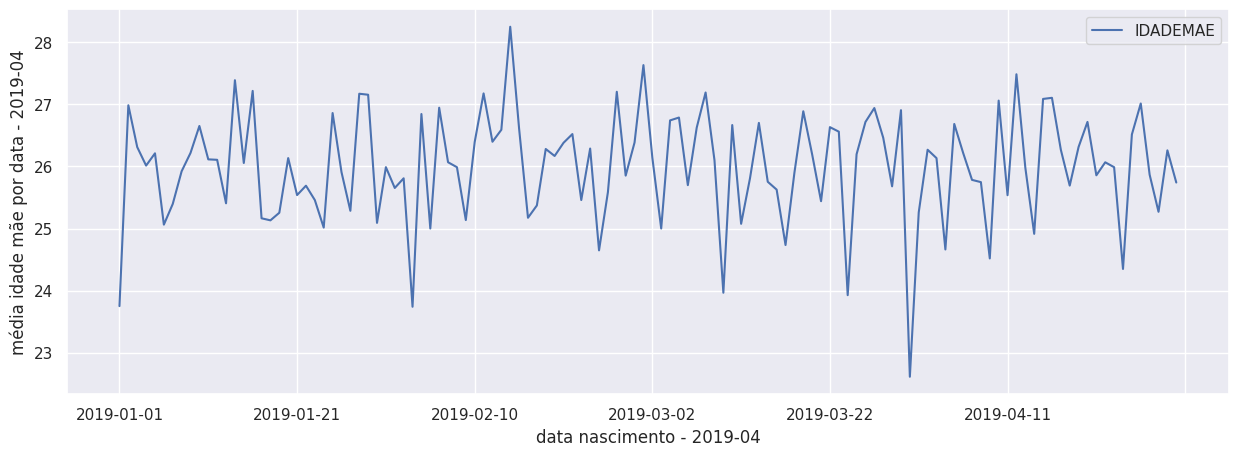

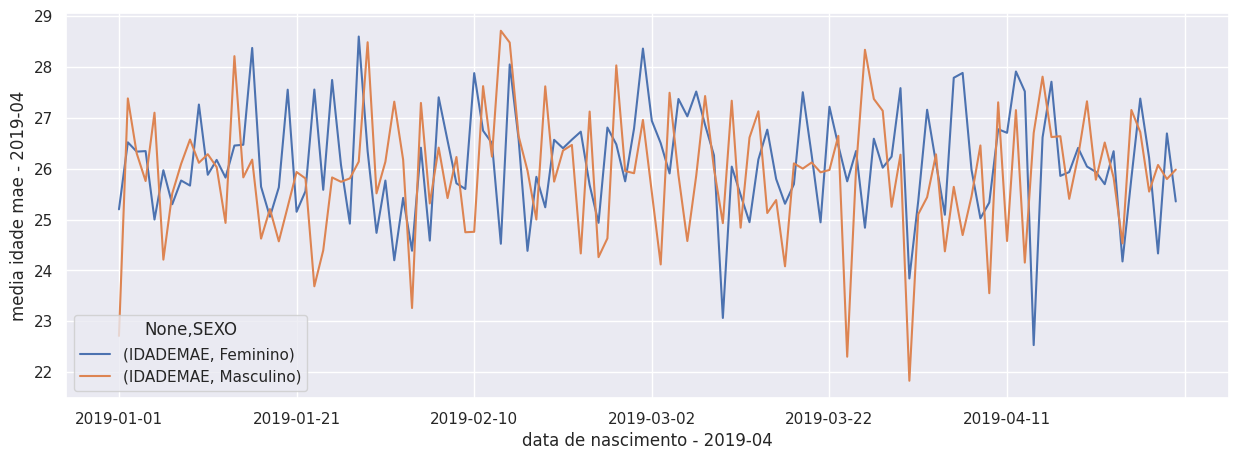

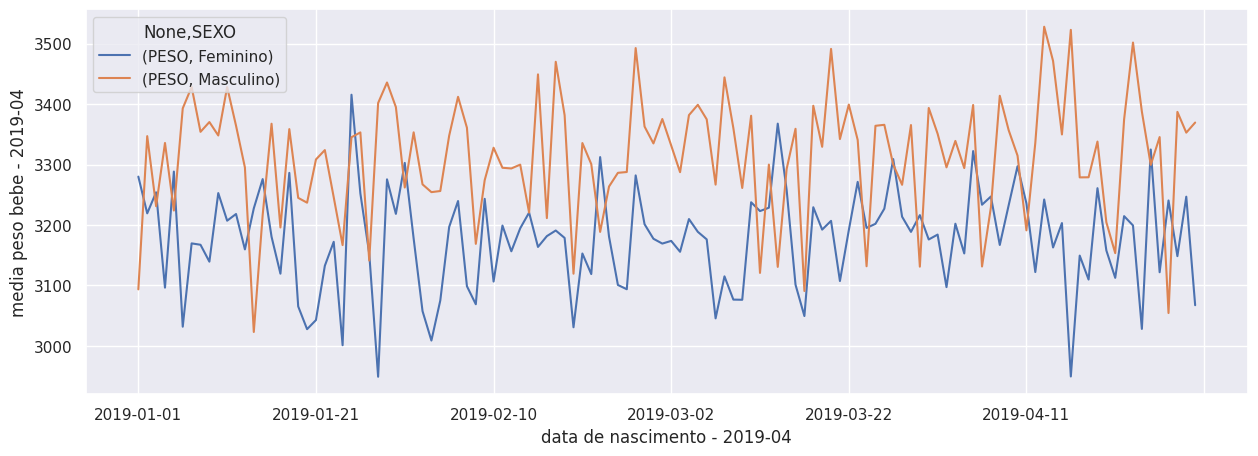

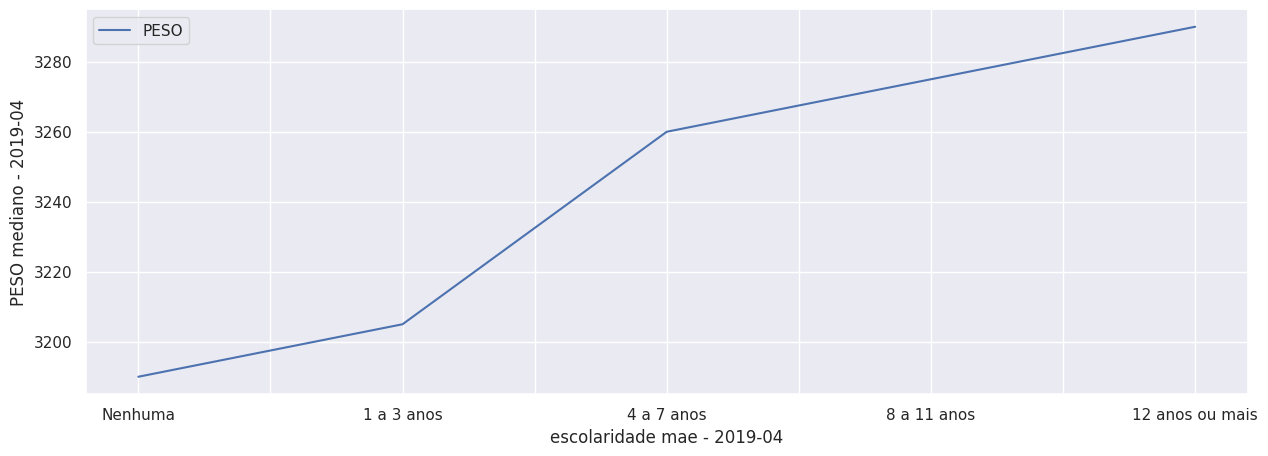

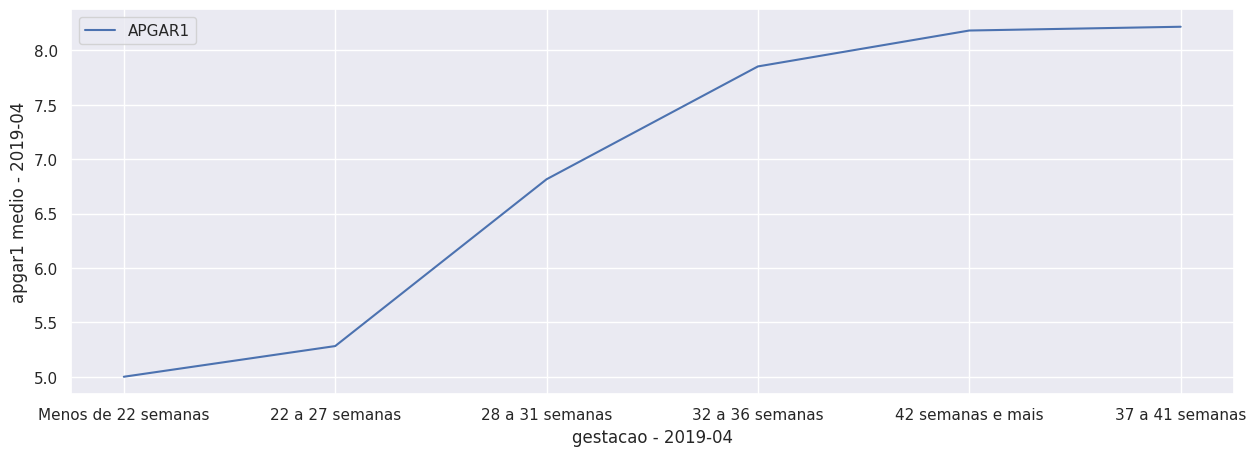

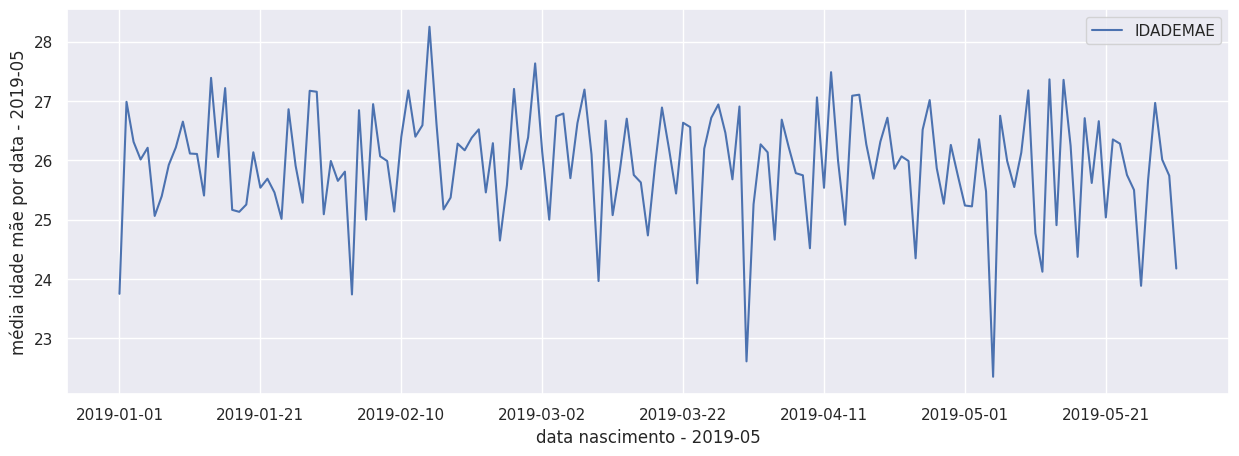

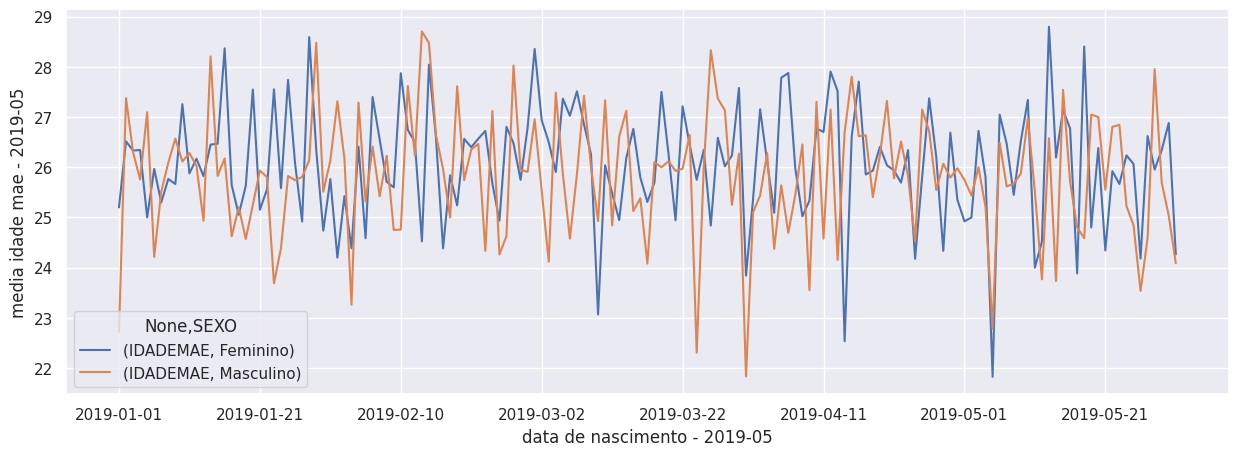

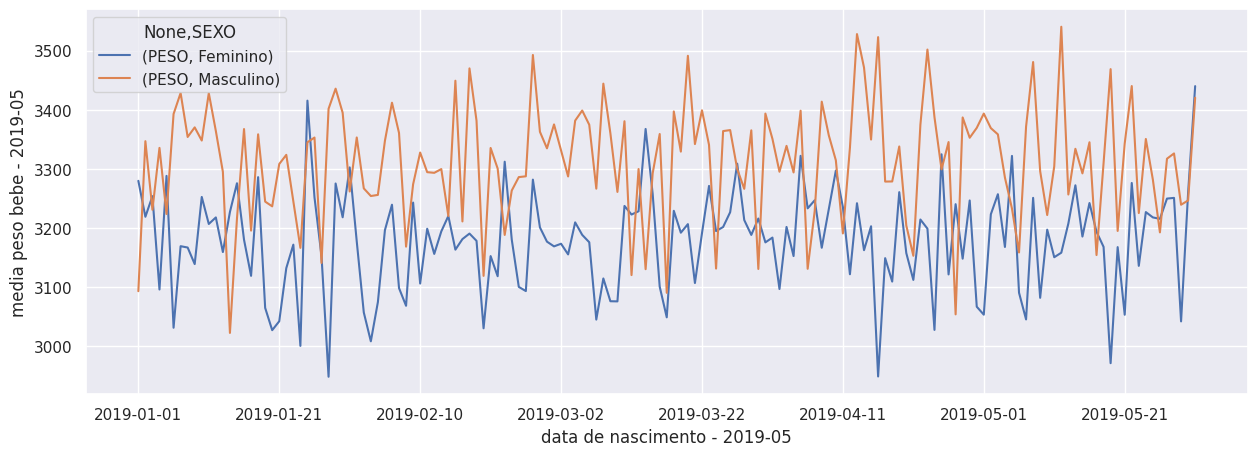

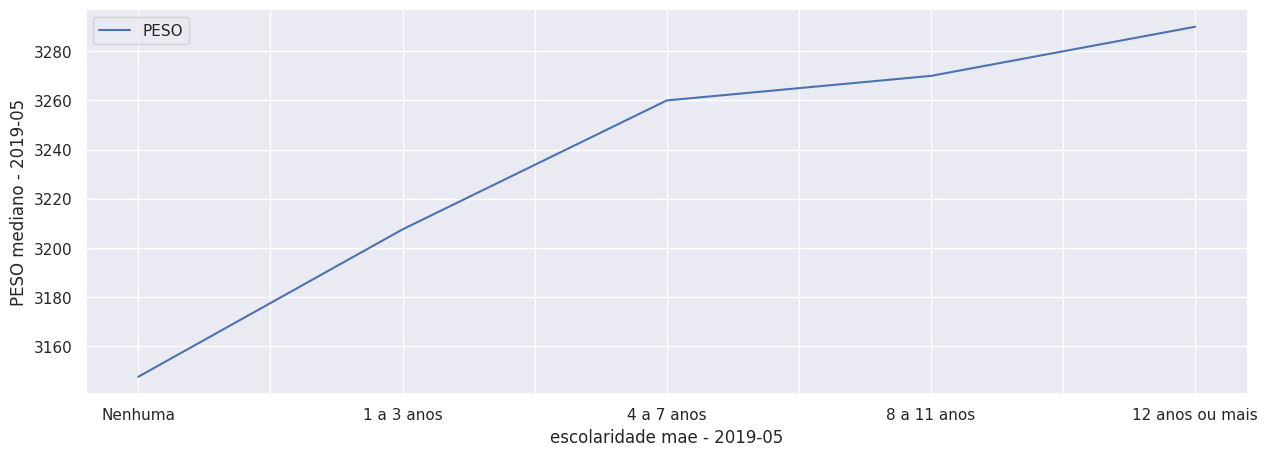

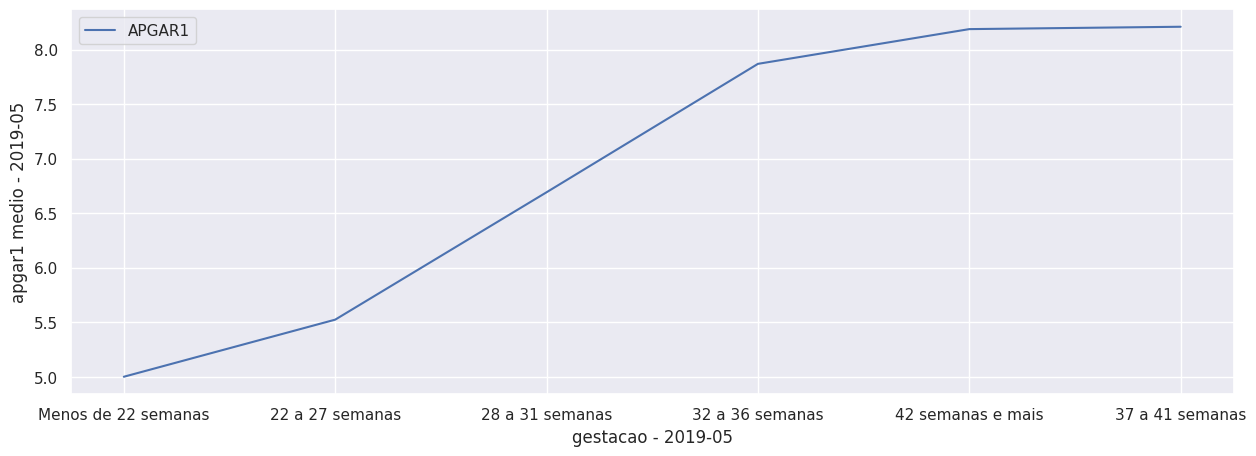

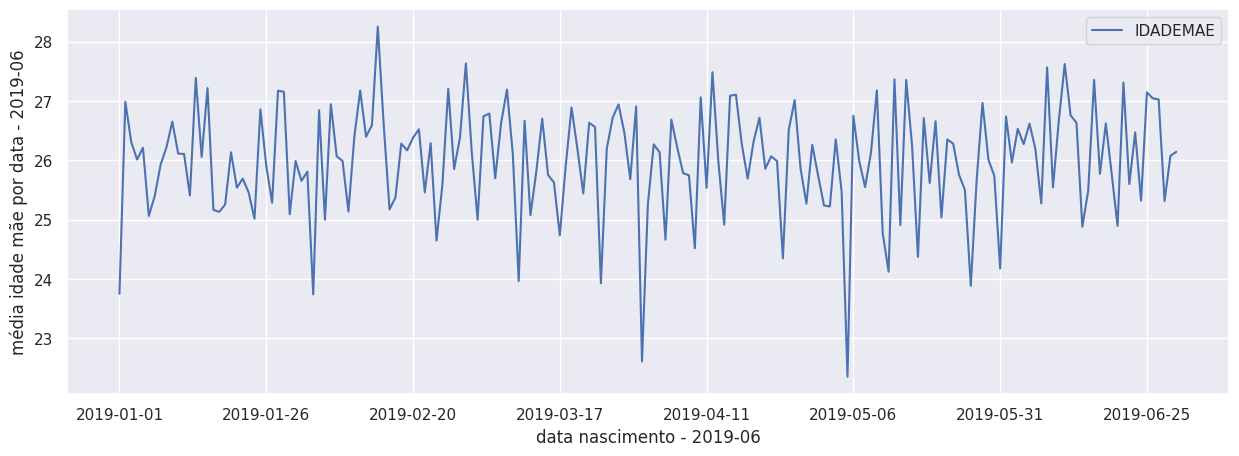

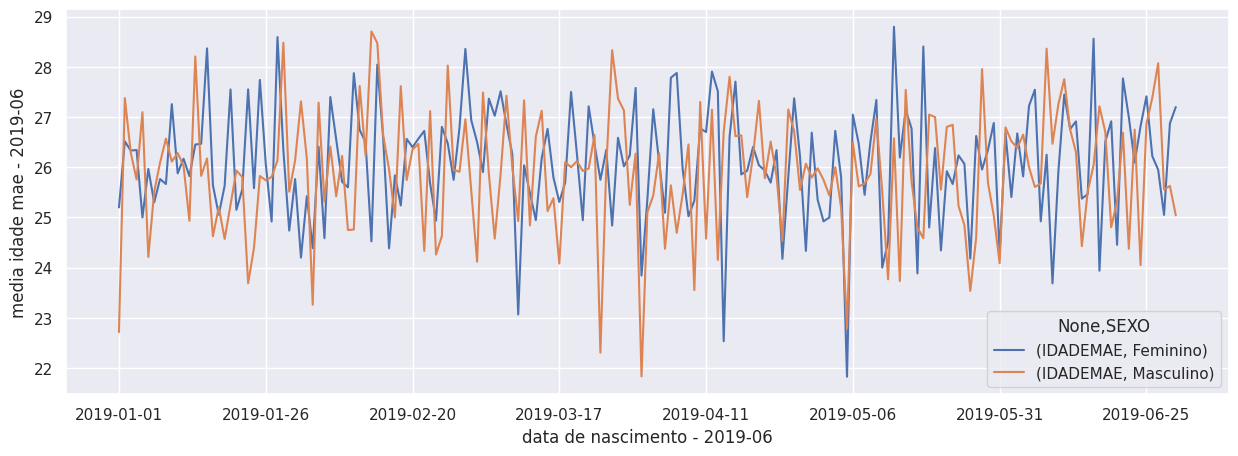

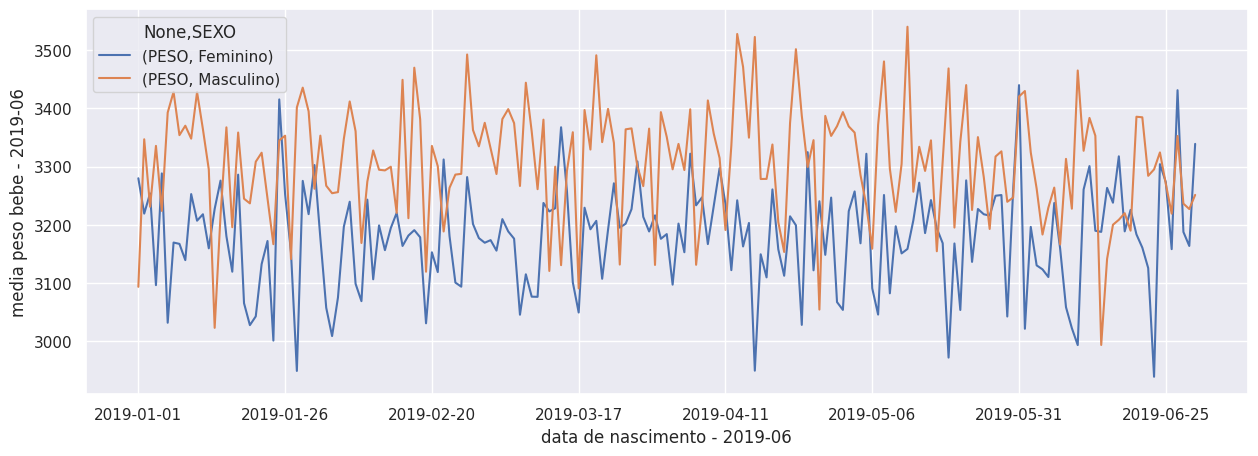

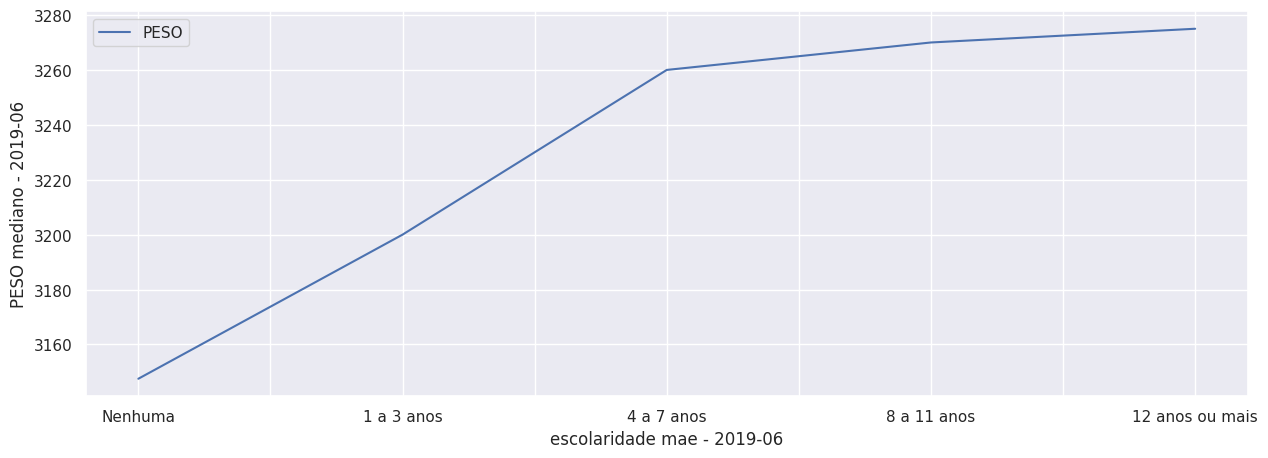

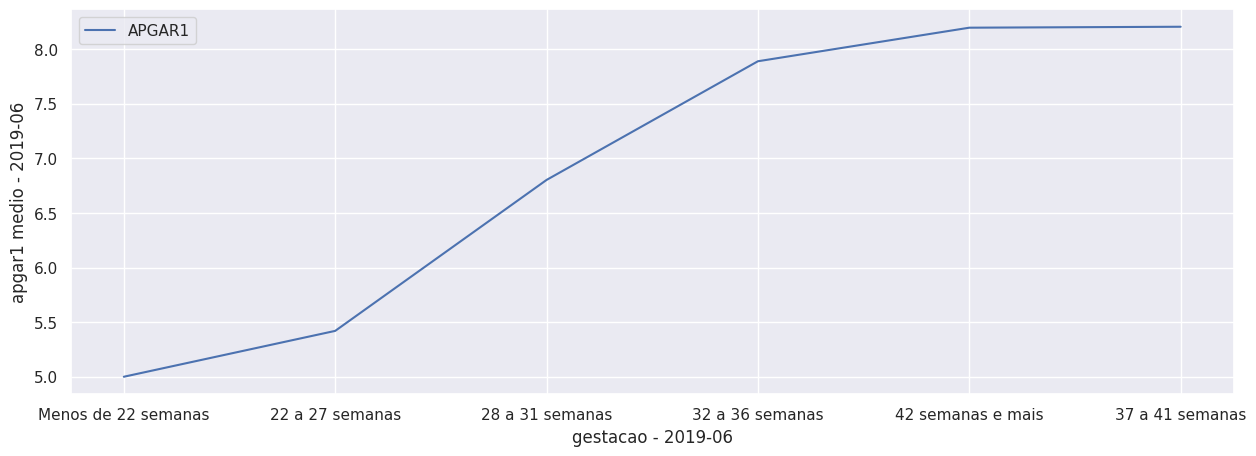

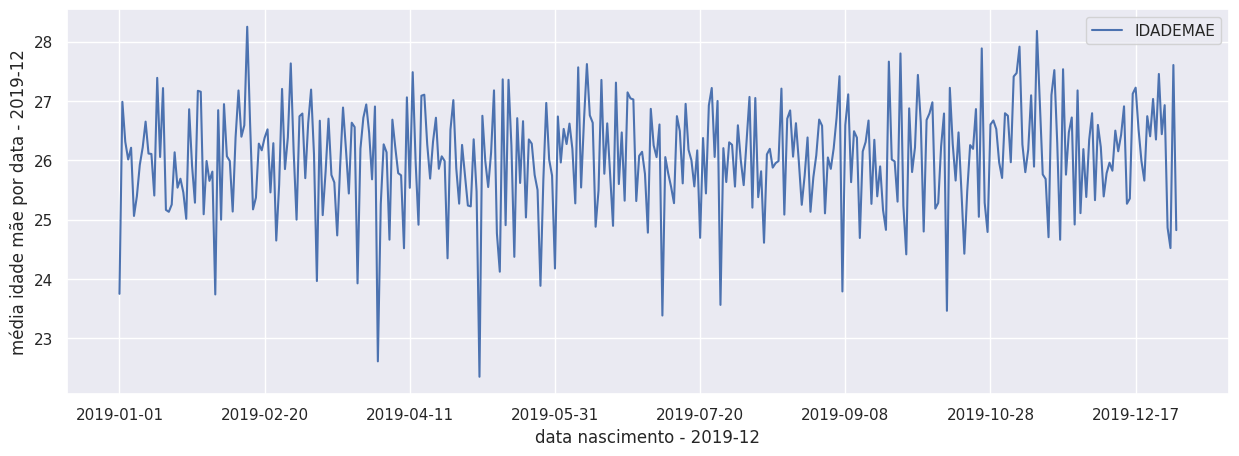

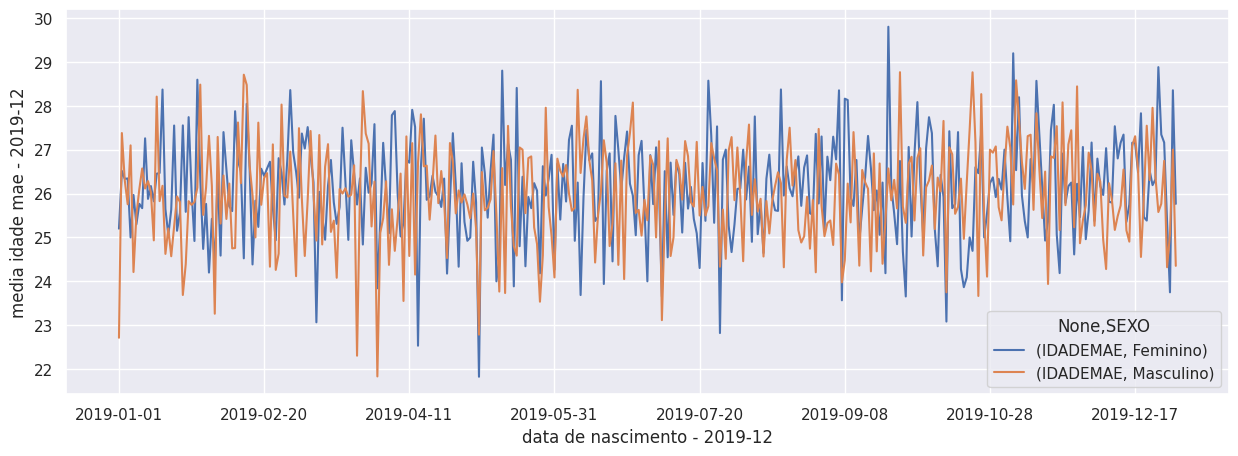

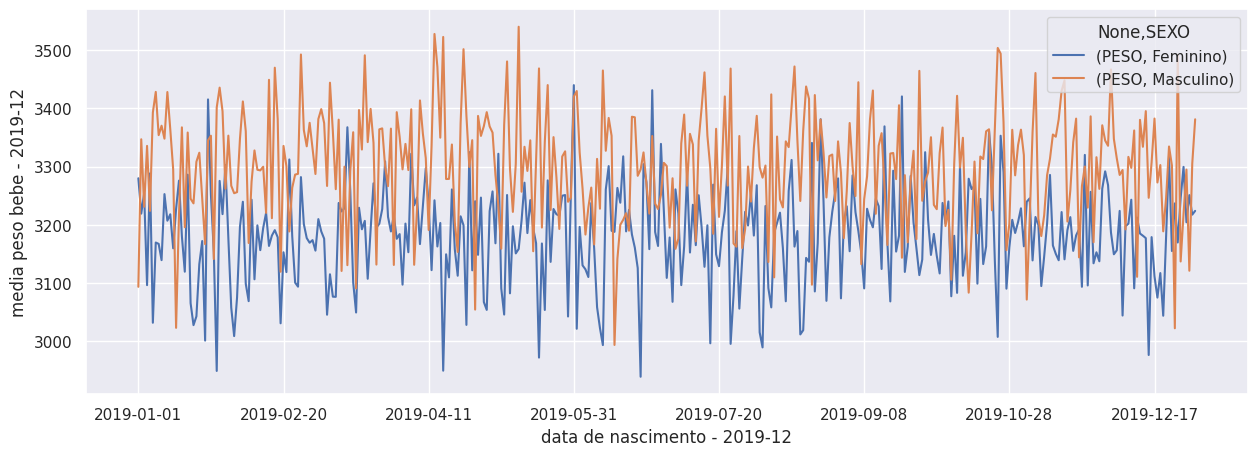

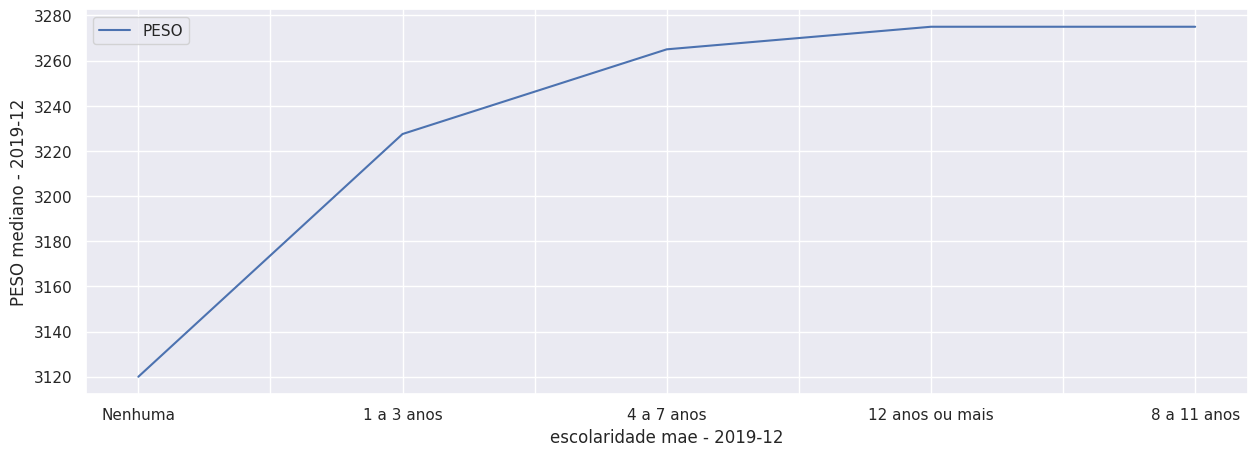

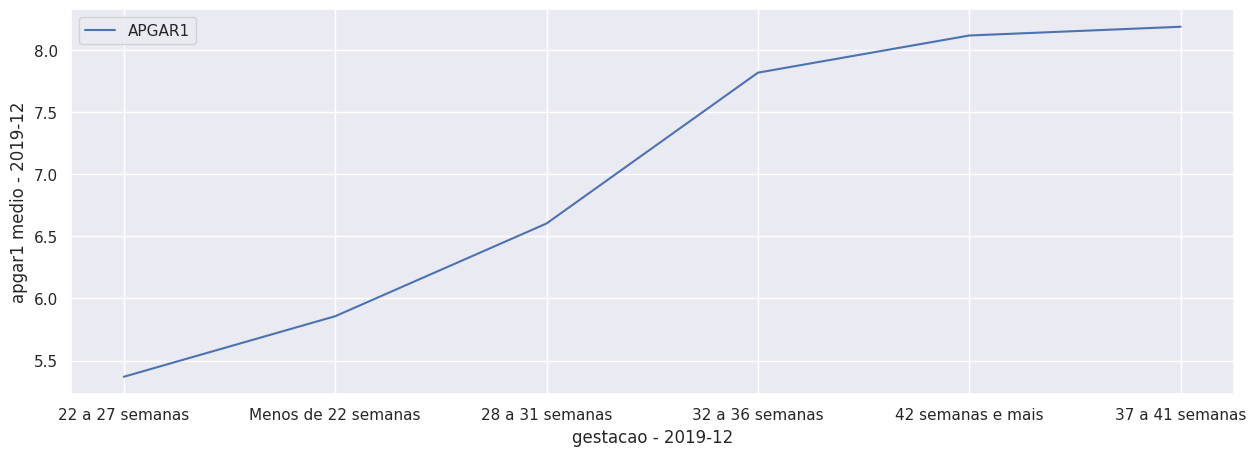

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set()  

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).unstack().plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

max_datas = ["MAR", "ABR", "MAI", "JUN", "DEZ"]

for item in max_datas:
    sinasc = pd.read_csv(F'./input/SINASC_RO_2019_{item}.csv')

    max_data = sinasc.DTNASC.max()[:7]
    print(max_data)


    os.makedirs('./output/figs/'+max_data, exist_ok=True)

    plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'mean', f'média idade mãe por data - {max_data}', f'data nascimento - {max_data}')
    plt.savefig('./output/figs/'+max_data+'/media idade mae por data.png')

    plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', f'media idade mae - {max_data}',f'data de nascimento - {max_data}','unstack')
    plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')

    plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', f'media peso bebe - {max_data}', f'data de nascimento - {max_data}','unstack')
    plt.savefig('./output/figs/'+max_data+'/media peso bebe por sexo.png')

    plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', f'PESO mediano - {max_data}', f'escolaridade mae - {max_data}','sort')
    plt.savefig('./output/figs/'+max_data+'/PESO mediano por escolaridade mae.png')

    plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', f'apgar1 medio - {max_data}', f'gestacao - {max_data}','sort')
    plt.savefig('./output/figs/'+max_data+'/media apgar1 por gestacao.png')

Como que você poderia fazer para deixar isso mais automatizado? Descreva na última célula do jupyter notebook o que ajudaria na hora de gerar novos gráficos pros meses/anos seguintes.

Uma forma de automatizar o código é utilizando recursos do python como o loop "for" lendo uma lista com os meses desejados e uma lista com os anos formando os links para consumo de apis através de manipulação de variáveis string e a biblioteca requests.

Exemplo abaixo:

In [ ]:
import requests

anos = ['2022', '2023', '2024']
meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']
url_base = 'http://exemplo.com/api/'

for ano in anos:
    for mes in meses:
        link = f'{url_base}{ano}/{mes}'
        response = requests.get(link)
        if response.status_code == 200:
            dados = response.json()